# K means on Optdigits dataset
Task - Apply PCA on Optdigits dataset. Choose features that explain 90% of the variance. Build a classifier using K-means, and calculate accuracy.

## Importing the required libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random as rd

## Loading & Visualising the Dataset
Here we are using pandas dataframe to load the data from the csv file

In [102]:
optdigits_df=pd.read_csv('optdigits_csv.csv') #Loading the dataset from the csv file
optdigits_df

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input56,input57,input58,input59,input60,input61,input62,input63,input64,class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
5616,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
5618,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


## Optdigits Dataset
* Optdigits dataset is the dataset of 5620 optical character recognition images each of which is a digit from 0-9 and the class labels are are also from 0-9
* Each image is a 8x8 image which flattens out to 64 elements. 
* Each row thus corresponds to the pixel value in that image and finally the last column in the dataset is its class label

In [103]:
optdigits_df.info() #This gives the information about the type of data stored in the dataset and also provides information about the number of items that are empty (if any)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5620 entries, 0 to 5619
Data columns (total 65 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   5620 non-null   int64
 1   input2   5620 non-null   int64
 2   input3   5620 non-null   int64
 3   input4   5620 non-null   int64
 4   input5   5620 non-null   int64
 5   input6   5620 non-null   int64
 6   input7   5620 non-null   int64
 7   input8   5620 non-null   int64
 8   input9   5620 non-null   int64
 9   input10  5620 non-null   int64
 10  input11  5620 non-null   int64
 11  input12  5620 non-null   int64
 12  input13  5620 non-null   int64
 13  input14  5620 non-null   int64
 14  input15  5620 non-null   int64
 15  input16  5620 non-null   int64
 16  input17  5620 non-null   int64
 17  input18  5620 non-null   int64
 18  input19  5620 non-null   int64
 19  input20  5620 non-null   int64
 20  input21  5620 non-null   int64
 21  input22  5620 non-null   int64
 22  input23  5620 non-null  

In [104]:
optdigits_df.describe() # This function describes each column of the dataset and give the count, mean, std, min, max value of all the elements in that column

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input56,input57,input58,input59,input60,input61,input62,input63,input64,class
count,5620.0,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,...,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000
mean,0.0,0.302135,5.393238,11.815480,11.578292,5.593772,1.379359,0.138256,0.003203,1.971174,...,0.166904,0.000356,0.281851,5.760498,11.989680,11.572420,6.720819,2.093594,0.254093,4.495196
std,0.0,0.879962,4.672719,4.255952,4.462546,5.631149,3.356633,1.046998,0.090423,3.098815,...,0.843455,0.018863,0.929969,5.021145,4.347542,4.975675,5.815564,4.047959,1.418558,2.868131
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,16.000000,...,13.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [105]:
data_features=optdigits_df.iloc[:,:64] #Here we are selecing the first 64 columns which contains our data
data_features

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input55,input56,input57,input58,input59,input60,input61,input62,input63,input64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,4,0,0,0,2,14,15,9,0,0
5616,0,0,6,16,13,11,1,0,0,0,...,1,0,0,0,6,16,14,6,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,0,2,9,13,6,0,0
5618,0,0,2,10,7,0,0,0,0,0,...,2,0,0,0,5,12,16,12,0,0


In [106]:
data_labels=optdigits_df.iloc[:,64:] #Here we are selecing the last column which contains the labels associated with our data
data_labels

,class
0,0
1,0
2,7
3,4
4,6
...,...
5615,9
5616,0
5617,8
5618,9


In [107]:
firstimage=data_features.iloc[0,:].to_numpy().reshape(8,8) #Here we are taking the first row and reshaping it into the size of the original image and then visualising it

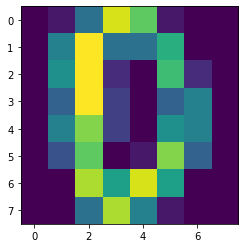

In [108]:
plt.imshow(firstimage) #This function visualises the image

In [109]:
print("Label of this first image : ",int(data_labels.iloc[0])) #Here we are printing the label associated with the first image

Label of this first image :  0


        count       mean        std   min        25%        50%        75%  \
count    65.0  65.000000  65.000000  65.0  65.000000  65.000000  65.000000   
mean   5620.0   4.904843   3.673705   0.0   1.784615   4.753846   7.769231   
std       0.0   4.189976   2.288066   0.0   2.874958   5.031249   6.587795   
min    5620.0   0.000000   0.000000   0.0   0.000000   0.000000   0.000000   
25%    5620.0   0.281851   1.046998   0.0   0.000000   0.000000   0.000000   
50%    5620.0   4.495196   4.255952   0.0   0.000000   4.000000   7.000000   
75%    5620.0   9.033808   5.825809   0.0   3.000000  10.000000  15.000000   
max    5620.0  11.989680   6.518238   0.0  10.000000  13.000000  16.000000   

             max  
count  65.000000  
mean   13.323077  
std     5.006582  
min     0.000000  
25%    14.000000  
50%    16.000000  
75%    16.000000  
max    16.000000  


<AxesSubplot:title={'center':'Maximum of Inputs'}, xlabel='Inputs', ylabel='Maximum'>

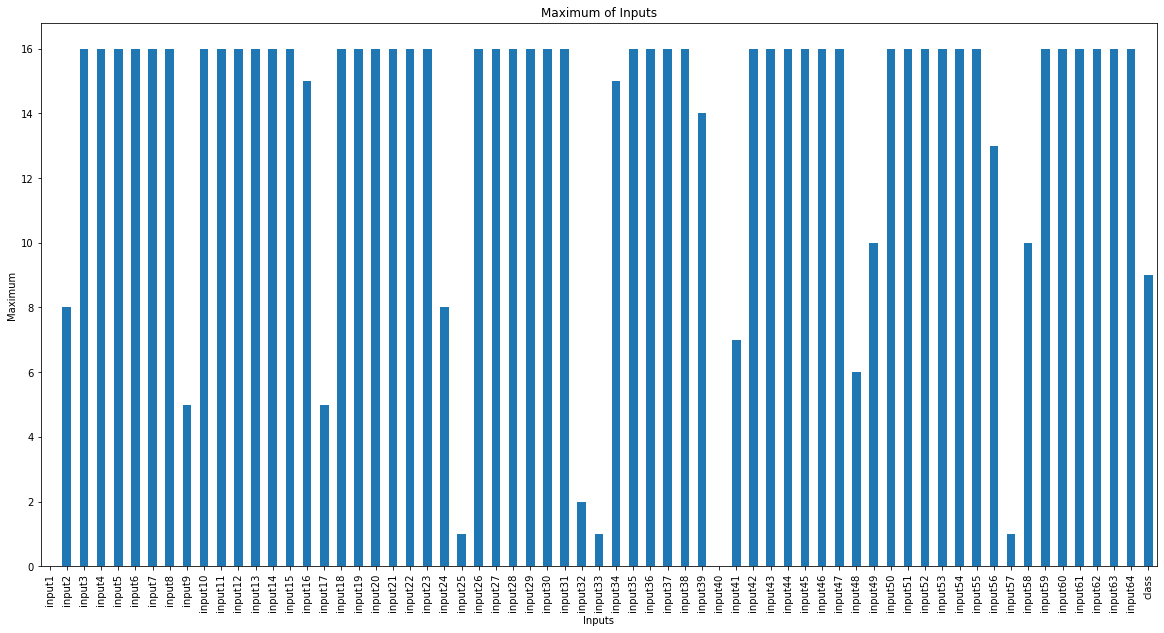

In [110]:
b=optdigits_df.describe() #Here we are describing the dataset and hence using it's max value to plot our bar graph that helps visualise the range of values that our dataset covers
trans=b.T
fig=plt.figure(figsize=(20,10))
plt.xlabel('Inputs')
plt.ylabel('Maximum')
plt.title('Maximum of Inputs')
print(trans.describe())
trans['max'].plot(kind='bar')

        count       mean        std   min        25%        50%        75%  \
count    65.0  65.000000  65.000000  65.0  65.000000  65.000000  65.000000   
mean   5620.0   4.904843   3.673705   0.0   1.784615   4.753846   7.769231   
std       0.0   4.189976   2.288066   0.0   2.874958   5.031249   6.587795   
min    5620.0   0.000000   0.000000   0.0   0.000000   0.000000   0.000000   
25%    5620.0   0.281851   1.046998   0.0   0.000000   0.000000   0.000000   
50%    5620.0   4.495196   4.255952   0.0   0.000000   4.000000   7.000000   
75%    5620.0   9.033808   5.825809   0.0   3.000000  10.000000  15.000000   
max    5620.0  11.989680   6.518238   0.0  10.000000  13.000000  16.000000   

             max  
count  65.000000  
mean   13.323077  
std     5.006582  
min     0.000000  
25%    14.000000  
50%    16.000000  
75%    16.000000  
max    16.000000  


<AxesSubplot:title={'center':'Mean of inputs'}, xlabel='Inputs', ylabel='Mean'>

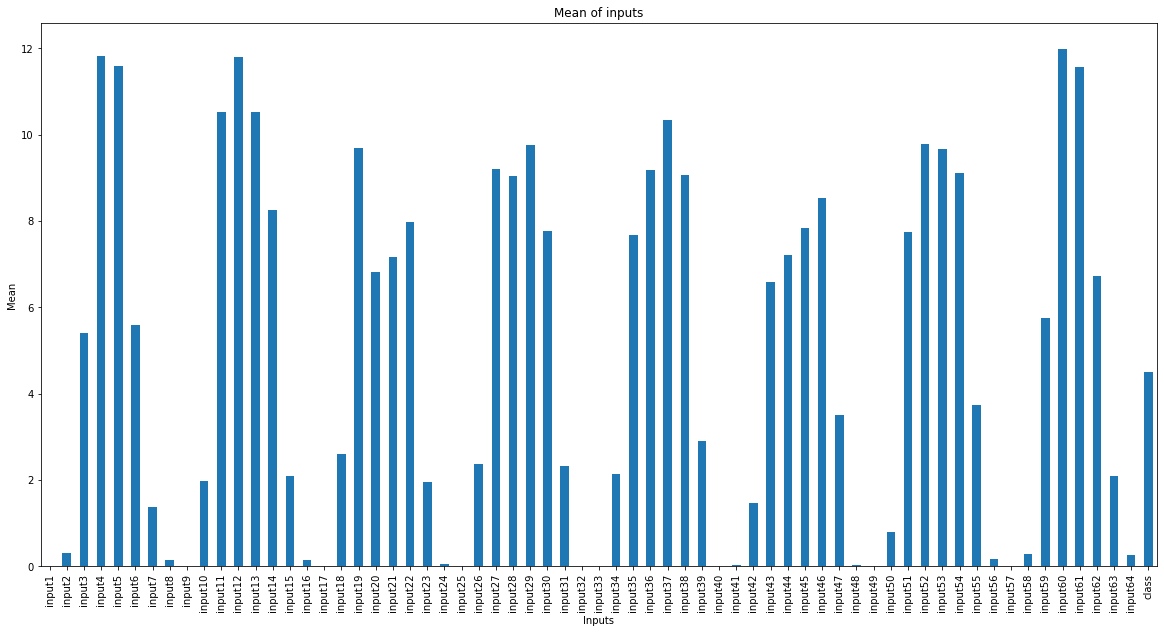

In [111]:
b=optdigits_df.describe() #Here we are describing the dataset and then taking the mean of the columns and plotting it in a bar graph. This helps visualise the mean values across all the columns in our dataset
trans=b.T
fig=plt.figure(figsize=(20,10))
plt.xlabel('Inputs')
plt.ylabel('Mean')
plt.title('Mean of inputs')
print(trans.describe())
trans['mean'].plot(kind='bar')

## Applying PCA
We are applying PCA to the entire dataset to reduce size from 64 features to some features that explain 90% of variance. 
1. We start by scaling and normalising the dataset. We make sure that each column has 0 mean and is standardised to unit variance.
2. Once done we can begin our Principal Component Analysis.
3. We find the eigen values and corresponding eigen vectors from the covariance matrix of the dataset. We then sort the eigen values in decreasing order along with their corresponding eigen vectors.
4. We then find out how many components explain around 90% of the variance. (As per the question) In our case we find that number to be around 32 components.
5. The original data is then recasted (or projected) onto the principal components and then returned back from the function.
6. The function below also visualises the cumulative variance explained by the features on the dataset.

In [112]:
def normalising_function(X):
    X_standard=StandardScaler().fit_transform(X)  #Scaling the dataset so that the range of values will be the same for all columns and thus helps in computation of values
    X_mean=np.mean(X_standard,axis=0)    #Finding the mean 
    X_cov=(X_standard - X_mean).T.dot((X_standard - X_mean))/(X_standard.shape[0]-1)  #Finding the covariance matrix
    return X_standard,X_mean,X_cov #returning the calculted matrices

In [113]:
def Principal_Component_Analysis(X):
    X_standard,X_mean,X_cov=normalising_function(X) #Storing the retunned matrices from the normalising_function()
    
    X_standard=X_standard-X_standard.mean(axis=0) #Subtracting the mean of each column from the dataset
    
    fig=plt.figure(figsize=(10,10))
    sns.heatmap(pd.DataFrame(X_cov))  #Creating a heatmap of the covariance matrix
    plt.show()
    
    eigenvalues, eigenvectors = np.linalg.eig(X_cov)  #Computing the eigen values and eigen vectors from the covariance matrix
    
    #The eigen vector corresponding to an eigen value is made into a pair and stored
    unsorted_eigen_value_vector_pair=[(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
    #Then it is sorted in the descreasing order and we get out eigen value-vector pair
    sorted_eigen_value_vector_pair=sorted(unsorted_eigen_value_vector_pair, reverse=True, key=lambda x:x[0])

    #Plotting a heatmap of the eigen vector pairs
    #This helps in visualing which eigen vectors are more prominent
    #As the more prominent value in the heatmap is the one which has greater intensity
    fig=plt.figure(figsize=(15,4))
    sns.heatmap(pd.DataFrame([pair[1] for pair in sorted_eigen_value_vector_pair[0:21]]),annot=False,cmap='coolwarm',vmin=-0.5,vmax=0.5)
    plt.ylabel("Ranked Eigen Values")
    plt.xlabel("Eigen Vector Components")
    plt.show()
    
    #We are calculating the variance explained by each eigen value
    lam_sum=sum(eigenvalues)
    explained_variance=[(lam_k/lam_sum) for lam_k in sorted(eigenvalues,reverse=True)]
    
    #Cumulatively a certain number of features will help explain the entire dataset
    #Here we are creating a scree graph to show the explained variance ratio
    plt.figure(figsize=(6,4))
    plt.bar(range(len(explained_variance)),explained_variance,alpha=0.5,align='center',label='Individual Explained variance $\lambda_{k}$')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Ranked Principal Components')
    plt.title('Scree Graph')
    plt.legend(loc='best')
    plt.tight_layout()
    
    #This graph is cumulatively showing the variance explained by the features
    #As required in the question we can see from the graph that around 0.9 of variance is explained by around 30-35 of the features
    fig = plt.figure(figsize=(6,4))
    ax1 = fig.add_subplot(111)
    ax1.plot(np.cumsum(explained_variance))
    ax1.set_ylim([0,1.0])
    ax1.set_xlabel('Number of Principal Components')
    ax1.set_ylabel('Cumulative explained variance')
    ax1.set_title('Explained Variance')
    plt.show()

    #We are printing the column indexes and the variance they explain
    #Once again this is a cumulative value
    #This is done to solidify our assumption that the principal components that explain 90% of variance are actually the first 32 eigen value-vector pairs
    print("\nCumulative variance explained by the features is shown here:")
    print([(j, np.cumsum(explained_variance)[j]) for j in range(len(explained_variance[:64]))])
    
    print("\nChoosing 5 Principal Components explains : ",np.cumsum(explained_variance)[5], "% of variance")
    print("Choosing 25 Principal Components explains : ",np.cumsum(explained_variance)[25], "% of variance")
    print("Choosing 32 Principal Components explains : ",np.cumsum(explained_variance)[32], "% of variance\n")

    
    #Finally we are creating our W.Transpose matrix of the most important components 
    #This will be multiplied with the dataset to reduce the features (because we are recasting or projecting the original dataset onto these principal components)
    matW = np.hstack( pair[1].reshape(64,1) for pair in sorted_eigen_value_vector_pair[0:32])#[0:4] originally
    print("\nShape of W.T matrix : ",matW.shape)

    #Multipling and returning the reduced features matrix
    Z = X_standard.dot(matW)
    print("Shape of returned features : ",Z.shape)
    
    return Z

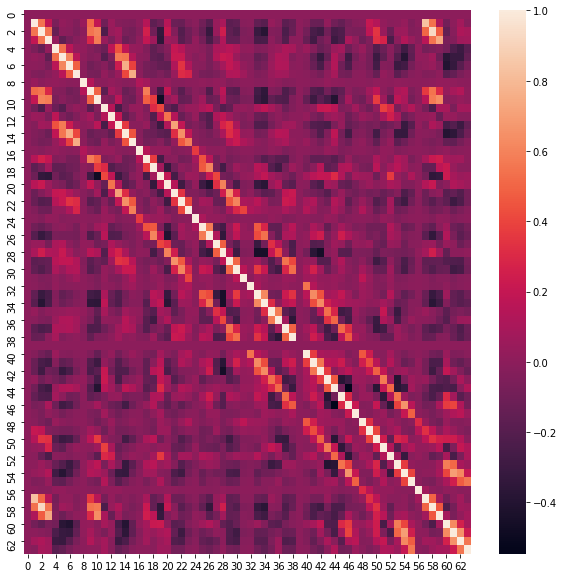

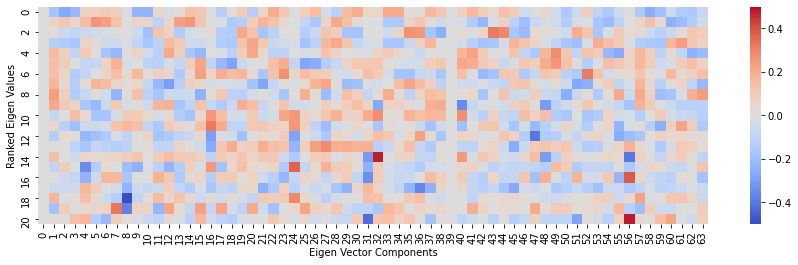

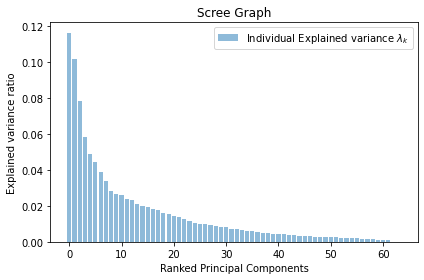

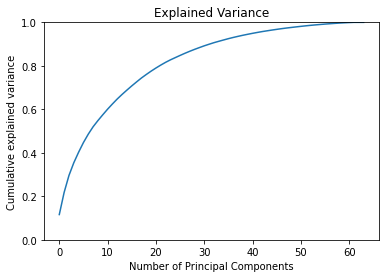


Cumulative variance explained by the features is shown here:
[(0, 0.11605857971544097), (1, 0.21776011612330715), (2, 0.2957820768680595), (3, 0.35416783000474455), (4, 0.4028966124322765), (5, 0.4473282585290348), (6, 0.48591602667694983), (7, 0.5198848369593643), (8, 0.5483551098075371), (9, 0.5749958761229538), (10, 0.6007911316116709), (11, 0.6247551798844067), (12, 0.6477193692540996), (13, 0.668685735427811), (14, 0.6885398127457847), (15, 0.7077989429543594), (16, 0.7261948184902295), (17, 0.744105885358598), (18, 0.7602160774689608), (19, 0.7755830961228707), (20, 0.7899864215896476), (21, 0.8034997499836584), (22, 0.8161341726764704), (23, 0.8275074818130197), (24, 0.8377775153578142), (25, 0.8479138853061892), (26, 0.8577568820173251), (27, 0.8669996538302912), (28, 0.8757870997969726), (29, 0.8840248469879816), (30, 0.8920763295816031), (31, 0.8993835342378772), (32, 0.9065040948562841), (33, 0.912809057502376), (34, 0.918969460714056), (35, 0.925005168918518), (36, 0.93055

In [114]:
reduced_data_features=Principal_Component_Analysis(data_features)

In [115]:
reduced_data_features.shape

(5620, 32)

In [116]:
pca_reduced_dataset = pd.DataFrame(reduced_data_features) 

In [117]:
pca_reduced_dataset['label'] =data_labels

## To perform Kmeans algorithm one has to follow these steps:
1. Decide the number of cluster in our case there are 10 digits to be classified so 10 clusters.
2. Initialize the centroid
3. Assign to each point in the dataset a centroid, respective centroid are assigned to each point by calculating the shortest distance between centroid and point.
4. Calculate the new centroid by calculating mean of all points assigned to the centroid.
5. Repeat the algorithm till value in centroid doesnt change

In [118]:
def test_train_splitter(reduced_data_features):
    train,test = train_test_split(reduced_data_features,test_size=0.20, random_state=1)
    division = train.shape[1] - 1
    train_without_label = train.iloc[:,0:division].values 
    train_with_label = train.iloc[:,:].values
    test_data = test.iloc[:,0:division].values  
    test_label = test.iloc[:,division].values 
    return train_with_label,train_without_label,test_data,test_label

## Centroid initialization
In this step centroids are initialized.    
It is ensured that centroids are initialized from each digit. 
Like centroid 0 will have data whose label is 0 and so on.
This ensures that every digit has a cluster which it can be classified.

In [119]:
def centroid_initialization(train_with_label,train_without_label):    
    i = 0
    Centroids=np.array([]).reshape(no_of_features,0)
    while(i<10):
        rand=rd.randint(0,m-1)
        # A point is guessed and label is correlated with i whose value varies from 0 - 10
        # If value of label is mached with i it is added in centroids
        # i is incremented
        # This step help us ensure that in cluster 0 centroid with feature whose label is 0 is assigned
        # This helps us as cluster zero most probably will point to digit 0
        if(train_with_label[rand,no_of_features] == i):
            Centroids=np.c_[Centroids,train_without_label[rand]]
            i = i + 1
    return Centroids

## K-Means Algorithm
From centroid EuclidianDistance is calculated with each Point and a cluster is assigned to a point based on the shortest distance with the cluster.  
Mean is calculated from each point in a respective centroid and is used as a new centroid.   

In [120]:
def kmeans_algorithm(train_with_label,train_without_label,Centroids):
    num_iter=100
    Output={} #output that will store each point in a cluster
    for n in range(100):
        EuclidianDistance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((train_without_label-Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1) # cluster for each point based on shortest distance from a centroid 
        #Calculating new mean
        Z={}
        for k in range(K):
            Z[k]=np.array([]).reshape(no_of_features,0)
            Output[k]=np.array([]).reshape(no_of_features+1,0)
        for i in range(m):
            Z[C[i]]=np.c_[Z[C[i]],train_without_label[i]]
            Output[C[i]]=np.c_[Output[C[i]],train_with_label[i]]     
        for k in range(K):
            Z[k]=Z[k].T
        for k in range(K):
            Centroids[:,k]=np.mean(Z[k],axis=0)
        return Output

### Showing all digits present in a cluster based on their labels

In [121]:
def print_number_in_all_cluster(Output):
    for i  in range(0,10):
        print("cluster "+str(i))
        print("Number of elements in a cluster: " + str(Output[i].shape[1]))
        print(Output[i][no_of_features,:])

### Visualizing points based on their features

In [122]:
def visualize_50_digits_in_cluster(Output):
    for j in range(0,10):
        plt.figure(figsize=(30,10))
        print('Cluster ' + str(j))
        numOfRows = 50
        print(str(Output[j].shape[1]) + " elements")
        for i in range(0,50):
            plt.subplot(5+1,10,i+1)
            image = Output[j][0:no_of_features,i]
            image = image.reshape(8,8)
            plt.imshow(image,cmap='gray')
            plt.axis('off')
        plt.show()

## Measuring Accuracy
The accuracy is Measured by calculating which cluster the data belongs and assigning the value of the respective cluster.  
Comparing how many are correctly identified and dividing with number of test data.

In [123]:
def measuring_accuracy(Centroids,test_data,test_label):
    #using the centroids calculated from training data we calculate the least distance using eucladian norm 
    # the point whose distance is least to a centroid the point is assigned to that centroid
    number_of_test_data = test_data.shape[0]
    EuclidianDistance=np.array([]).reshape(number_of_test_data,0)
    for k in range(K):
        tempDist=np.sum((test_data-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    predicted_value=np.argmin(EuclidianDistance,axis=1) #tells to which cluster data point is assigned
    number_of_correct_prediction = 0
    for i in range(0,predicted_value.shape[0]):
        if(predicted_value[i] == test_label[i]): #comapring the cluster value to actual label we find number of correct prediction
            number_of_correct_prediction = number_of_correct_prediction + 1
    accuracy = number_of_correct_prediction/number_of_test_data * 100
    print('Accurcy in test Dataset:')
    print(accuracy)

In [124]:
train_with_label,train_without_label,test_data,test_label = test_train_splitter(pca_reduced_dataset)
m = train_without_label.shape[0] #no. of points in training dataset
no_of_features = train_without_label.shape[1] #number of features
K=10 #number of clusters
Centroids = centroid_initialization(train_with_label,train_without_label)
Output = kmeans_algorithm(train_with_label,train_without_label,Centroids)

In [125]:
print_number_in_all_cluster(Output)

cluster 0
Number of elements in a cluster: 514
[0. 4. 0. 0. 0. 0. 0. 4. 0. 0. 4. 0. 0. 9. 0. 4. 0. 0. 0. 0. 0. 0. 4. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 4. 0. 0. 0. 2. 0. 4. 0. 0. 4. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 4. 4. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 4. 0. 0. 4. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 9. 0. 0. 0. 0. 0. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 9. 0. 0. 0. 0. 0. 0. 4. 4. 0. 0. 0. 4. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 4. 0. 0. 0. 4. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 6. 4. 0. 4. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 4. 0. 4. 0. 0. 0. 0. 0. 4. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0.
 0. 0. 0. 0. 0. 4. 0. 9. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

This Output shows us like how digits are classified by the kmeans method.  
As can be seen here there are many digits which are classified in a single cluster.
Taking example of cluster 0
We can see features with label 0 6 4 7 have been clusttered together but majority of them is 0.     
This gives us the conclusion that the cluster 0 may point to digit 0 for majority of features that depicts 0.

In [126]:
measuring_accuracy(Centroids,test_data,test_label)

Accurcy in test Dataset:
66.81494661921708


Accuracy is just a metric which tells like for how many points does our data guess the value of our digit correctly.   
To measure accuracy we just compared the identified digit to the label.   
Dividing the number of correctly guessed value to Total value.

* One of the reasons for low accuracy is the PCA that has been done, it has reduced the number of features to only the most important components. But in some edge cases this can be a problem. 
* Another reason for accuracy value varying in each run of this program is the centroid that has been decided by the Kmean algorithm. The centroid is chosen at random and hence this leads to different accuracy values obtained in each run of this algorithm.